## Import & clean data

> https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

In [71]:
import pandas as pd

pd.set_option('display.max_rows', 200)


> plots available in pandas


        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot



In [48]:
# import population data in Wales for 2001, 2018

path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_population.csv'

pop = pd.read_csv(path + file)

In [49]:
pop[:3]

,area,pop_one,pop_eighteen
0,Isle of Anglesey,"67,806","69,961"
1,Gwynedd,"116,844","124,178"
2,Conwy,"109,674","117,181"


In [133]:
# check data types 

pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Isle of Anglesey to Merthyr Tydfil
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pop_one       22 non-null     int64
 1   pop_eighteen  22 non-null     int64
dtypes: int64(2)
memory usage: 1.1+ KB


In [53]:
# fix integers

# remove the ,
pop = pop.replace(',','', regex = True)

# cast population columns to integers
pop.pop_one = pop.pop_one.astype(int)
pop.pop_eighteen = pop.pop_eighteen.astype(int)

In [55]:
# check datatypes again

print(pop.info())
pop[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     int64 
 2   pop_eighteen  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes
None


,area,pop_one,pop_eighteen
0,Isle of Anglesey,67806,69961
1,Gwynedd,116844,124178
2,Conwy,109674,117181


## Plot

In [134]:
# use area names column as index (instead of row numbers) - this will label our x axis

pop.set_index('area', inplace=True)

KeyError: "None of ['area'] are in the columns"

<AxesSubplot:xlabel='area'>

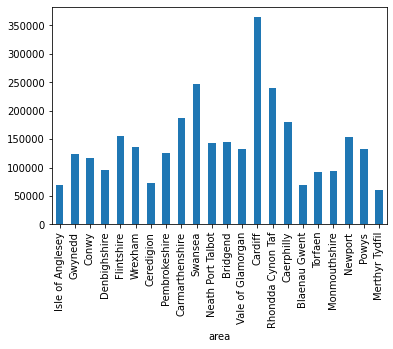

In [135]:
# bar chart

pop.pop_eighteen.plot(kind = 'bar')

<AxesSubplot:ylabel='area'>

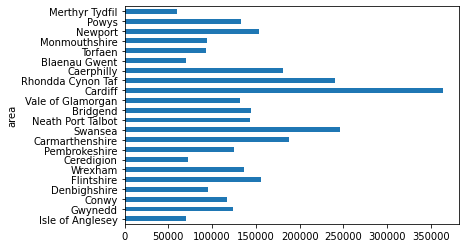

In [60]:
# horizontal bar chart

pop.pop_eighteen.plot(kind = 'barh')

<AxesSubplot:ylabel='area'>

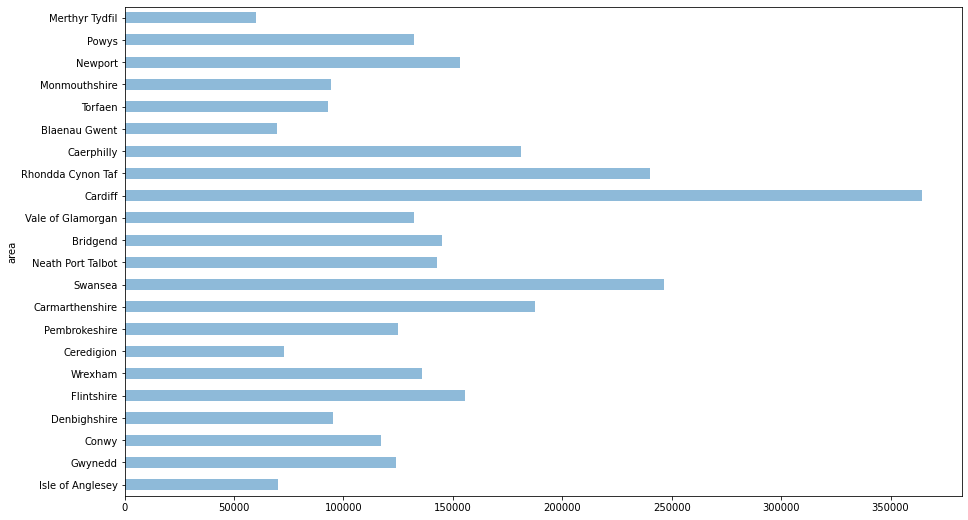

In [136]:
# with adjusted opacity and figure size

pop.pop_eighteen.plot(kind = 'barh', y = 'population (2018)', alpha = 0.5, figsize=(15,9))

<AxesSubplot:>

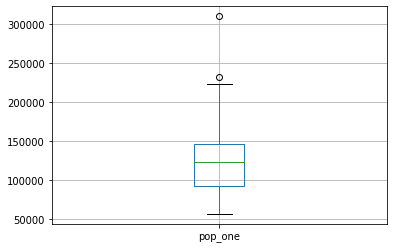

In [74]:
# box plots by single column...

pop.boxplot('pop_one') 

<AxesSubplot:>

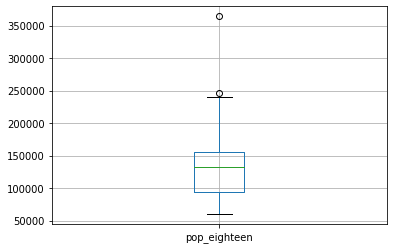

In [75]:
pop.boxplot('pop_eighteen')

<AxesSubplot:>

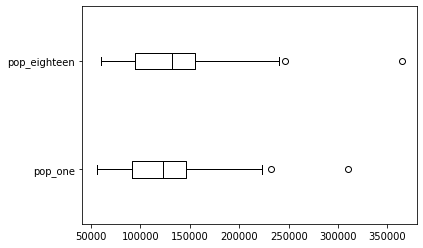

In [137]:
# ... and by df

pop.boxplot(vert=False, grid = False, color = 'black')

<AxesSubplot:ylabel='pop_one'>

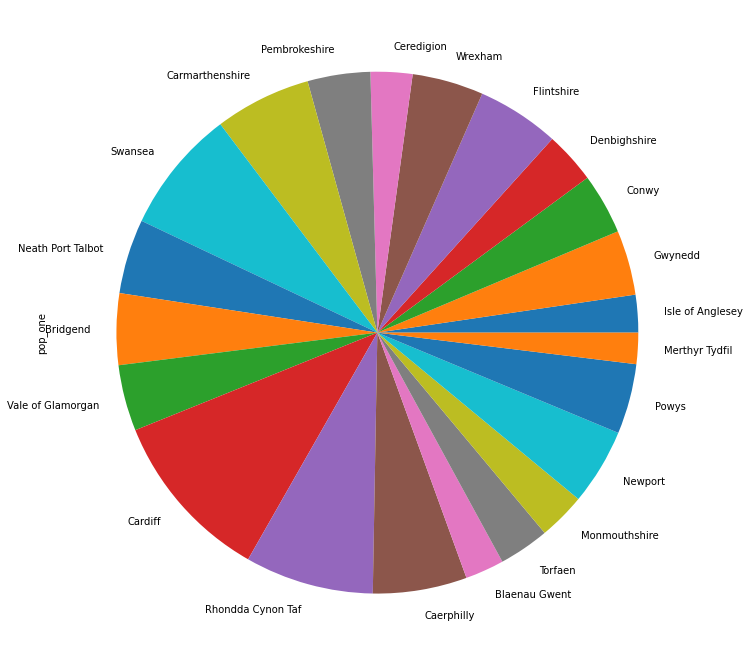

In [138]:
# piechart

pop['pop_one'].plot.pie(figsize=(20,12))


<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Area'>

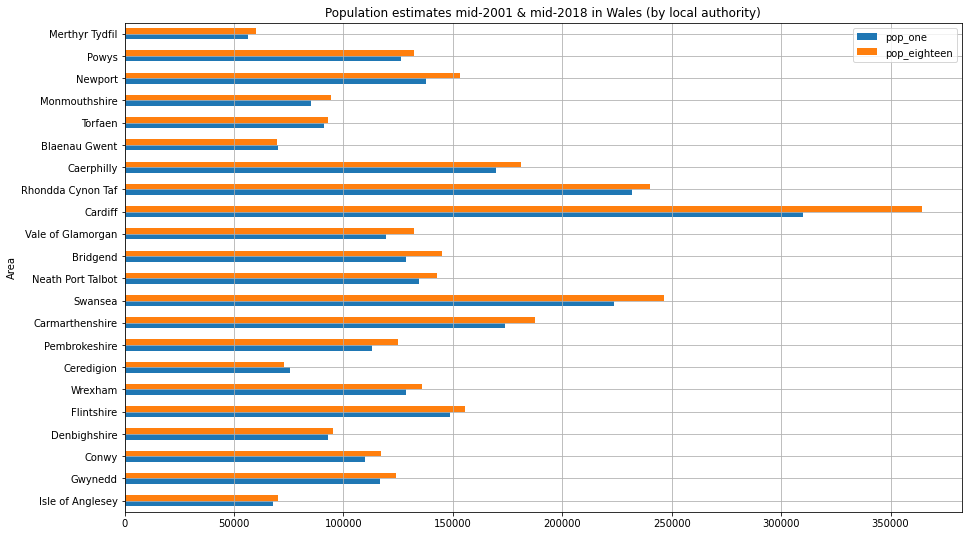

In [82]:
# barchart stacked with title, grid and labels

pop[['pop_one','pop_eighteen']].plot(kind = 'barh', 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')

<AxesSubplot:>

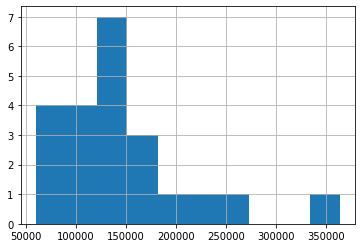

In [63]:
# histogram on a column

pop.pop_eighteen.hist()

<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Frequency'>

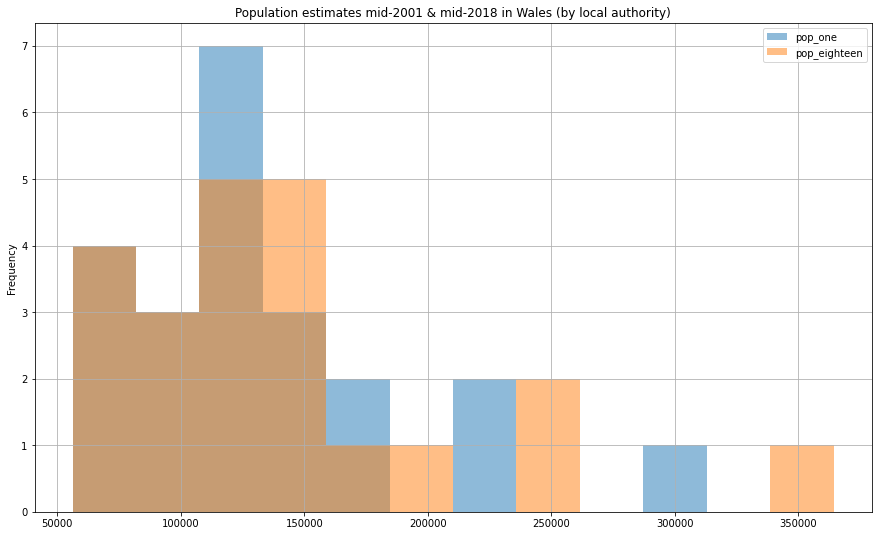

In [140]:
# histogram on both cols

pop[['pop_one','pop_eighteen']].plot(kind = 'hist', 
                                     alpha = 0.5, 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     bins = 12,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')


## Wales pubs AND population 2018

In [129]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_all.csv'

pp = pd.read_csv(path + file)

In [130]:
pp[:3]

,area,pubs,pop
0,Isle of Anglesey,60,69961
1,Gwynedd,120,124178
2,Conwy,100,117181


<AxesSubplot:xlabel='population', ylabel='pubs'>

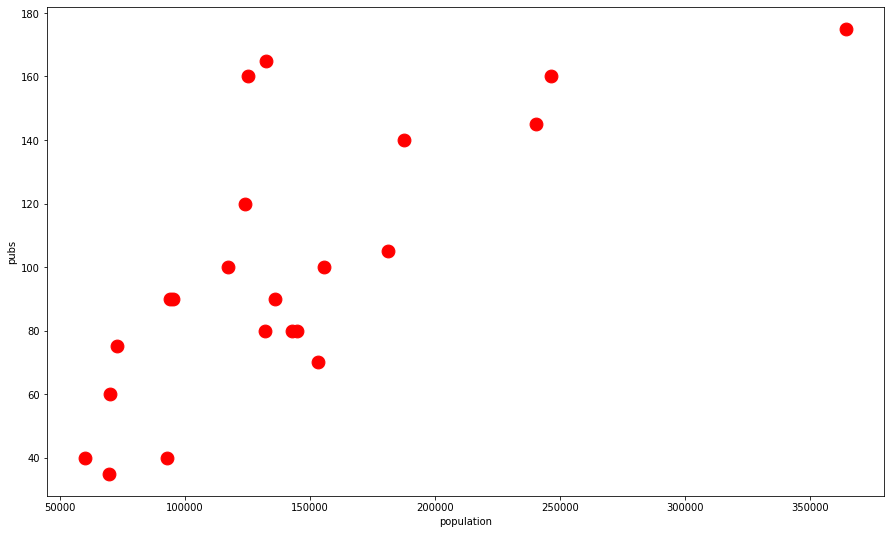

In [141]:
# scatterplot with dotsize (s) and dotcolour (c)

pp.plot(kind = 'scatter', 
        x = 'pop', 
        y = 'pubs', 
        figsize=(15,9),
        s = 165, 
        c = 'r',
        xlabel = 'population')

## also

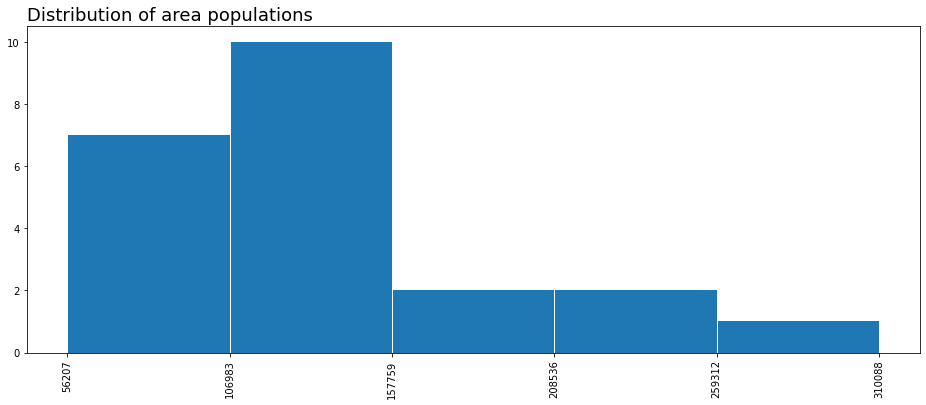

In [126]:
# histogram, using matplotlib

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,6))

n, bins, patches = plt.hist(pop.pop_one, bins = 5)

plt.xticks(bins, rotation = 'vertical')
plt.grid(color = 'white', lw = 1.0, axis = 'x')
plt.title('Distribution of area populations', fontsize = 18, loc = 'left')
plt.show()
